# Hypothesis

## Importing Libraries

In [160]:
from math import sqrt
import numpy as np
import pandas as pd
import scipy.stats as stats
import operator
import matplotlib.pyplot as plt
import numpy as np
# import libraries
# import os
# import csv

## Reading Data

In [166]:
# Read the CSV into a pandas data frame (df)
df = pd.read_csv('ncbirth1450.csv', sep=',')

# Headings in the CSV File
headings = ["PLURAL", "SEX", "MAGE", "WEEKS", "MARITAL", "RACEMOM", "HISPMOM", "GAINED", "SMOKE", "DRINK", "TOUNCES", "TGRAMS", "LOW", "PREMIE"]

# Filtering rows having #NULL! Data
df = df[(df.PLURAL != "#NULL!") & (df.SEX !="#NULL!") & (df.MAGE !="#NULL!") & (df.WEEKS !="#NULL!") 
        & (df.MARITAL !="#NULL!") & (df.RACEMOM !="#NULL!") & (df.HISPMOM !="#NULL!") & (df.GAINED !="#NULL!")
        & (df.SMOKE !="#NULL!") & (df.DRINK !="#NULL!") & (df.TOUNCES !="#NULL!") & (df.TGRAMS !="#NULL!") 
        & (df.LOW !="#NULL!") & (df.PREMIE !="#NULL!") ]

# Converting Weeks into Float 64
df["WEEKS"] = pd.to_numeric(df["WEEKS"])
## print(df["WEEKS"].describe())

# Writing Data into New File
df.to_csv('csv_file.csv')
# print(df)


###########
# Functions
###########
# To check if Hypothesis should be rejected or not with P value and Alpha
def hypothesisCheck(p_value, alpha):
    if p_value < alpha:
        print("P Value < alpha")
        print("There is sufficient evidance to reject Null Hypothesis (H0)\nAccepting Alternative Hypothesis (H1)")
    elif p_value == alpha:
        print("P Value == alpha")
        print("There is sufficient evidance to reject Null Hypothesis (H0)\nAccepting Alternative Hypothesis (H1)")
    else:
        print("P Value > alpha")
        print("There is sufficient evidance to accept the Null Hypothesis (H0)\nRejecting Alternative Hypothesis (H1)")

# To check if Hypothesis should be rejected or not with Test Statistics and Total Critical
def hypothesisCheck2(test_static, total_critical):
    if test_static > total_critical:
        print("Test Statics > total_critical")
        print("There is sufficient evidance to reject Null Hypothesis (H0)\nAccepting Alternative Hypothesis (H1)")
    elif test_static < -total_critical:
        print("Test Statics < -total_critical")
        print("There is sufficient evidance to reject Null Hypothesis (H0)\nAccepting Alternative Hypothesis (H1)")
    else:
        print("Test Statics < total_critical")
        print("There is sufficient evidance to accept the Null Hypothesis (H0)\nRejecting Alternative Hypothesis (H1)")

ops = { 
       "==": operator.eq, 
       ">=": operator.ge,
       "<=": operator.le,
       ">": operator.gt,
       "<": operator.lt 
    } 


def hypothesisCalculator(
    # df                  = DataFram you want to enter
    # df_population       = The column of Popluation to test
    # df_sample           = The column of Sample to test
    # sample_operator     = The operator used to check the condition
    # condition           = The value that will be used to check the condition
    # confidence_interval = The CI value of your data. Example: 0.05 (95%)
    # total_critical      = The total_critical obtained from Degree of Freedom and Confidence Interval
    # name                = The name the user would like to choose.
    # isPound             = A condition which calculates the data if the obtained data is in pound.
    df, 
    df_population,
    df_sample, 
    sample_operator,
    condition,
    confidence_interval,
    total_critical,
    name,
    isPound
):
    
    condition = (condition * 16) if (isPound.lower() == "yes" or isPound.lower() == "yeah") else condition
    # print(condition)
    sign = []
    if sample_operator == "==": sign.append("equals")
    if sample_operator == ">=": sign.append("is greater than or equal to")
    if sample_operator == "<=": sign.append("is less than or equal to")
    if sample_operator == ">": sign.append("over")
    if sample_operator == "<": sign.append("below")
      
    # Creating Sample Data Frame and Storing them in Variables
    population_DF = df[df_population]
    sample_DF = df.sample(frac=0.45) # Random Selection of samples
    calculated_sample = sample_DF[df_sample]
    
    # Calculating Lengths
    population_data_length = len(population_DF-1)
    sample_data_length = len(calculated_sample-1)
    
    # Calculating Mean and SD
    mean_population_DF = population_DF.mean()
    mean_sample_df = calculated_sample.mean()
    std_sample_df = np.std(calculated_sample, ddof=1)

    # Calculating Degree of Freedom and Test Statitics
    degree_of_freedom = sample_data_length - 1
    test_static = ((mean_sample_df - condition)/(std_sample_df/sqrt(sample_data_length)))
    
    # T-Score and P-Value
    population_array = np.array(population_DF)
    sample_array = np.array(calculated_sample)
    tscore, p_value = stats.ttest_1samp(sample_array, condition)
    
    # Printing the Summary
    print("Summary")
    print(f"Popluation Data of {name} =", population_data_length)
    print(f"Popluation Mean of {name} =", round(mean_population_DF,2))
    
    print("")
    print(f"Sample Data of {name} {sign[0]} {condition} =", sample_data_length)
    print(f"Mean of {name} {sign[0]} {condition} =", round(mean_sample_df,2))
    print(f"ST.D of {name} {sign[0]} {condition} =", round(std_sample_df,3))
    
    print("")
    print("Confidence Interval =", confidence_interval)
    print("Degree of Freedom =", degree_of_freedom)
    print("Test Critical =", round(total_critical,3))
    print("Test Statics = ", round(test_static,3))

    print("")
    print("T-Score = ", round(tscore,3))
    print("P-Value = ", round(p_value,3))
    
    print("")
    hypothesisCheck(p_value, confidence_interval)
    # hypothesisCheck2(tscore, p_value)
    sign.clear()
    print("------------------------------------")
    print("")

## Frequency Tables

In [162]:
##################
# Frequency Tables
##################
print("##################\n# Frequency Tables\n##################")

# Low Birth Weighs
lowBirthWeighs = pd.crosstab(index=df['LOW'], columns=['Count'])
lowBirthWeighs['Percentage'] = ((lowBirthWeighs/lowBirthWeighs.sum())*100).round(2)
print("# Low Birth Weighs")
print(lowBirthWeighs)
print("")

# Smokers
Smokers = pd.crosstab(index=df['SMOKE'], columns=['Count'])
Smokers['Percentage'] = ((Smokers/Smokers.sum())*100).round(2)
print("# Smokers")
print(Smokers)
print("")



##################
# Frequency Tables
##################
# Low Birth Weighs
col_0  Count  Percentage
LOW                     
0       1290       91.55
1        119        8.45

# Smokers
col_0  Count  Percentage
SMOKE                   
0       1203       85.38
1        206       14.62



## Summary Table

In [145]:
################
# Summary Tables
################
print("################\n# Summary Tables\n################")
print("")
["Mean", "Median", "Standard Deviation", "Minimum", "Maximum"]

print(df.agg(
    {
        "WEEKS": ["mean", "median", "std",  "min", "max"],
        "MAGE":  ["mean", "median", "std",  "min", "max"],
        "TOUNCES":  ["mean", "median", "std",  "min", "max"],
    }
).round(2))



################
# Summary Tables
################

        WEEKS   MAGE  TOUNCES
mean    38.65  26.79   116.44
median  39.00  26.00   118.00
std      2.65   6.09    22.13
min     22.00  13.00    12.00
max     45.00  43.00   181.00


## Results

### Test 1

In [167]:
##################
# a) Age Over 25 : Confidence Interval = 95%
##################
# Note, in this step, we want to test that our data 
## has woman aging over 25 when giving birth
print("")
print("################\n# a) Age Over 25\n################")

print("")
print("H0 = If the mean age is not over 25.")
print("H1 = If the mean age is over 25.")
print("")

hypothesisCalculator(df, "MAGE", "MAGE", ">", 25, 0.05, 1.962979, "M.Age", "No")




################
# a) Age Over 25
################

H0 = If the mean age is not over 25.
H1 = If the mean age is over 25.

Summary
Popluation Data of M.Age = 1409
Popluation Mean of M.Age = 26.79

Sample Data of M.Age over 25 = 634
Mean of M.Age over 25 = 26.96
ST.D of M.Age over 25 = 6.203

Confidence Interval = 0.05
Degree of Freedom = 633
Test Critical = 1.963
Test Statics =  7.939

T-Score =  7.939
P-Value =  0.0

P Value < alpha
There is sufficient evidance to reject Null Hypothesis (H0)
Accepting Alternative Hypothesis (H1)
------------------------------------



### Test 2

In [168]:
#####################
# b) Below 39 Weeks : Confidence Interval = 95%
#####################
# Note, in this step, we want to test that our data
## has woman that gave birth before 39 weeks
print("")
print("###################\n# b) Below 39 Weeks\n###################")

print("")
print("H0 = If the mean week of mothers giving brith have not gone below 39 Weeks.")
print("H1 = If the mean week of mothers giving brith have gone below 39 Weeks.")
print("")

hypothesisCalculator(df, "WEEKS", "WEEKS", "<", 39, 0.05, 1.9643, "Weeks", "No")




###################
# b) Below 39 Weeks
###################

H0 = If the mean week of mothers giving brith have not gone below 39 Weeks.
H1 = If the mean week of mothers giving brith have gone below 39 Weeks.

Summary
Popluation Data of Weeks = 1409
Popluation Mean of Weeks = 38.65

Sample Data of Weeks below 39 = 634
Mean of Weeks below 39 = 38.69
ST.D of Weeks below 39 = 2.636

Confidence Interval = 0.05
Degree of Freedom = 633
Test Critical = 1.964
Test Statics =  -2.923

T-Score =  -2.923
P-Value =  0.004

P Value < alpha
There is sufficient evidance to reject Null Hypothesis (H0)
Accepting Alternative Hypothesis (H1)
------------------------------------



### Test 3

In [169]:
#################
# c) Above 7lbs : Confidence Interval = 95%
#################
# Note, in this step, we want to test that our data
## has babies weighing over 7lbs
print("")
print("###############\n# c) Above 7lbs\n###############")

print("")
print("H0 = If the mean weight of babies have not gone above 7.")
print("H1 = If the mean weight of babies have gone above 7.")
print("")

hypothesisCalculator(df, "TOUNCES", "TOUNCES", ">", 7, 0.05, 1.9627, "Pounds", "Yes") # "Yeah" is also an option



###############
# c) Above 7lbs
###############

H0 = If the mean weight of babies have not gone above 7.
H1 = If the mean weight of babies have gone above 7.

Summary
Popluation Data of Pounds = 1409
Popluation Mean of Pounds = 116.44

Sample Data of Pounds over 112 = 634
Mean of Pounds over 112 = 117.08
ST.D of Pounds over 112 = 22.054

Confidence Interval = 0.05
Degree of Freedom = 633
Test Critical = 1.963
Test Statics =  5.797

T-Score =  5.797
P-Value =  0.0

P Value < alpha
There is sufficient evidance to reject Null Hypothesis (H0)
Accepting Alternative Hypothesis (H1)
------------------------------------



### Test 4

#############################################
# d) Sample Touces of Smokers and Non-Smokers
#############################################

Considering from the mapping of plot, the data is likely that mean weight of smokers are less than the non-smokers


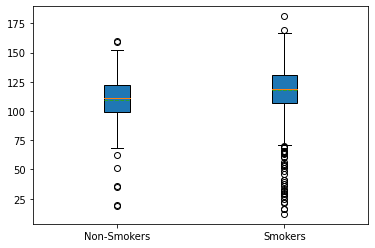

#######################################
# Mean Tounces of Smokers < Non-smokers
#######################################

H0 = If the mean tounces of women isn't less than non-smoking women.
H1 = If the mean tounces of women is less than non-smoking women


Summary
Non-Smokers mean value: 109.29
Smokers mean value: 117.67

Non-Smokers std value: 21.67
Smokers std value: 21.961

alpha = 0.05
p-value = 0.752

P Value > alpha
There is sufficient evidance to accept the Null Hypothesis (H0)
Rejecting Alternative Hypothesis (H1)


In [170]:
#############################################
# d) Sample Touces of Smokers and Non-Smokers
#############################################

print("#############################################\n# d) Sample Touces of Smokers and Non-Smokers\n#############################################")
# Considering from the mapping of plot, the data is likely that mean weight of smokers are higher than the non-smokers
print("")
print("Considering from the mapping of plot, the data is likely that mean weight of smokers are less than the non-smokers")
# Non-Smokers Data
non_smokers_df = df[(df['SMOKE']>"0")]
non_smokers_df = non_smokers_df["TOUNCES"]
non_smokers_df_array = np.array(non_smokers_df)
non_smokers_data = non_smokers_df_array

# Smokers Data
smokers_df = df[(df['SMOKE']<"1")]
smokers_df = smokers_df["TOUNCES"]
smokers_df_array = np.array(smokers_df)
smokers_data = smokers_df_array

data = [non_smokers_df_array, smokers_df_array]

# Creating Plots
fig, ax = plt.subplots()
ax.boxplot(data, patch_artist=True, meanline=True, showmeans=True)
plt.xticks([1, 2], ["Non-Smokers", "Smokers"])

# showing plot
plt.show()

#######################################
# Mean Tounces of Smokers < Non-smokers
#######################################
print("#######################################\n# Mean Tounces of Smokers < Non-smokers\n#######################################")
print("")
print("H0 = If the mean tounces of women isn't less than non-smoking women.")
print("H1 = If the mean tounces of women is less than non-smoking women")
print("")
# print(smokers_df.describe())
# print(stats.shapiro(smokers_df))
# print(non_smokers_df.describe())
# print(stats.shapiro(non_smokers_df))
# print(stats.levene(smokers_df, non_smokers_df))
# res = stats.ttest_ind(non_smokers_df, smokers_df)

print("")
print("Summary")
non_smokers_data_mean = np.mean(non_smokers_data)
smokers_data_mean = np.mean(smokers_data)
print("Non-Smokers mean value:",round(non_smokers_data_mean, 2))
print("Smokers mean value:",round(smokers_data_mean, 2))

print("")
non_smokers_data_std = np.std(non_smokers_data)
smokers_data_std = np.std(smokers_data)
print("Non-Smokers std value:",round(non_smokers_data_std, 3))
print("Smokers std value:",round(smokers_data_std,3))

print("")
ttest,pval = stats.levene(smokers_df, non_smokers_df)
print("alpha =", 0.05)
print("p-value =", round(pval,3))

print("")
hypothesisCheck(pval, 0.05)



### Test 5

In [172]:
######################
# e) Tounces Above 110 : Confidence Interval = 95%
######################
# Note, in this step, we want to test that our data
## If woman that gave birth have babies weighing above 110.
print("")
print("######################\n# e) Tounces Above 110\n######################")

print("")
print("H0 = If the mean weight of babies isn't above 110 tounces.")
print("H1 = If the mean weight of babies is above 110 tounces.")
print("")

hypothesisCalculator(df, "TOUNCES", "TOUNCES", ">", 110, 0.05, 1.9627, "Weight", "No")


######################
# e) Tounces Above 110
######################

H0 = If the mean weight of babies isn't above 110 tounces.
H1 = If the mean weight of babies is above 110 tounces.

Summary
Popluation Data of Weight = 1409
Popluation Mean of Weight = 116.44

Sample Data of Weight over 110 = 634
Mean of Weight over 110 = 115.97
ST.D of Weight over 110 = 22.492

Confidence Interval = 0.05
Degree of Freedom = 633
Test Critical = 1.963
Test Statics =  6.682

T-Score =  6.682
P-Value =  0.0

P Value < alpha
There is sufficient evidance to reject Null Hypothesis (H0)
Accepting Alternative Hypothesis (H1)
------------------------------------

